In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners =[] 
strings = """ [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]"""

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.2,
    risk_tolerance_stdev = 0.01,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.01,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 100
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [4]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[9675]
log initialized
Average similarity between family members is 0.9847329680279373 at temperature -1
Average similarity between family and home is 0.9918600523109693 at temperature -1
Average similarity between students and their classroom is 0.9857918466511398 at temperature -1
Average similarity between workers is 0.987846662791255 at temperature -1
Average friend similarity for adults: 0.9836812456951098 for kids: 0.9755655329711691
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuild

avg restaurant similarity 0.8378520480704987
avg restaurant similarity 0.8607014369424242
avg restaurant similarity 0.8521651589342482
avg restaurant similarity 0.8552725317109092
avg restaurant similarity 0.8184791599966734
avg restaurant similarity 0.813766310300119
avg restaurant similarity 0.8453780815216969
avg restaurant similarity 0.8450569629179151
avg restaurant similarity 0.8371930012514956
avg restaurant similarity 0.8287752270377864
avg restaurant similarity 0.8377311345127506
avg restaurant similarity 0.8472526907948219
avg restaurant similarity 0.8903693590633637
avg restaurant similarity 0.852358789616581
avg restaurant similarity 0.8456552924766066
avg restaurant similarity 0.7973449780140732
avg restaurant similarity 0.7594300707875458
avg restaurant similarity 0.81597770129075
avg restaurant similarity 0.8219979586734447
avg restaurant similarity 0.8557085438995182
avg restaurant similarity 0.7868410118198321
avg restaurant similarity 0.8568308796513374
avg restaurant

avg restaurant similarity 0.8630572501715842
avg restaurant similarity 0.8360019875053569
avg restaurant similarity 0.8716877352028389
avg restaurant similarity 0.8488305887740771
avg restaurant similarity 0.8699002629887724
avg restaurant similarity 0.8447754187303405
avg restaurant similarity 0.8377244477446187
avg restaurant similarity 0.8524636002709393
avg restaurant similarity 0.7976354014193384
avg restaurant similarity 0.8049995347261674
avg restaurant similarity 0.8620035612809163
avg restaurant similarity 0.8205662435320366
avg restaurant similarity 0.8394522777386868
avg restaurant similarity 0.8328272786236437
avg restaurant similarity 0.8204294616859269
avg restaurant similarity 0.8373506133010368
avg restaurant similarity 0.859174763303215
avg restaurant similarity 0.8158101712254251
avg restaurant similarity 0.8440749293723145
avg restaurant similarity 0.8461066245157931
avg restaurant similarity 0.8258479170137765
avg restaurant similarity 0.8094449399769001
avg restaur

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.6541]
min:
0.6541
max:
0.6541
std:
0.0
mean:
0.6541
median:
0.6541
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.03403055555555556]
min:
0.03403055555555556
max:
0.03403055555555556
std:
0.0
mean:
0.03403055555555556
median:
0.03403055555555556
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.301075]
min:
0.301075
max:
0.301075
std:
0.0
mean:
0.301075
median:
0.301075
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.006633333333333334]
min:
0.006633333333333334
max:
0.006633333333333334
std:
0.0
mean:
0.006633333333333334
median:
0.006633333333333334
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on icu:
data: [0.0017638888888888888]
min:
0.0017638888888888888
max:
0.0017638888888888888
std:
0.0
mean:
0.0017638

(<function dict.items>, <function dict.items>, <function dict.items>)

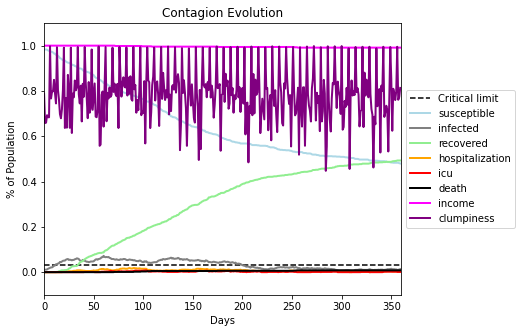

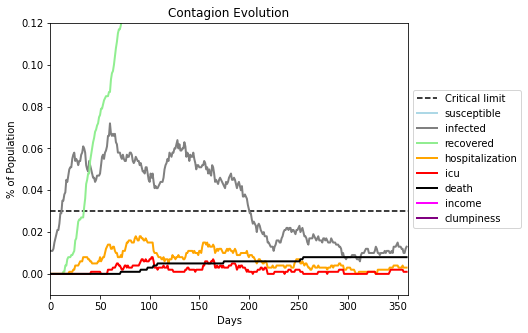

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.9823072193882906 at temperature -0.999
Average similarity between family and home is 0.9916652366396199 at temperature -1
Average similarity between students and their classroom is 0.9863901211844452 at temperature -0.999
Average similarity between workers is 0.9852097674326942 at temperature -0.999
Average friend similarity for adults: 0.9829171007459605 for kids: 0.9772402350009239
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding

avg restaurant similarity 0.9046523075968742
avg restaurant similarity 0.9124006951458419
avg restaurant similarity 0.9444427477361979
avg restaurant similarity 0.9209198735217331
avg restaurant similarity 0.8915321587959932
avg restaurant similarity 0.9068700785936167
avg restaurant similarity 0.948599108377419
avg restaurant similarity 0.933568121551529
avg restaurant similarity 0.9413901620446201
avg restaurant similarity 0.9269320172161508
avg restaurant similarity 0.9041196979707471
avg restaurant similarity 0.9121930615643331
avg restaurant similarity 0.9168406536761147
avg restaurant similarity 0.9126843857290987
avg restaurant similarity 0.9234704607507993
avg restaurant similarity 0.9366232769383329
avg restaurant similarity 0.880366738287748
avg restaurant similarity 0.9273883331925172
avg restaurant similarity 0.9344393931816617
avg restaurant similarity 0.8916611162812105
avg restaurant similarity 0.8973605412830585
avg restaurant similarity 0.9679097306118454
avg restauran

avg restaurant similarity 0.9310515802231006
avg restaurant similarity 0.9420908454080816
avg restaurant similarity 0.8904779481221652
avg restaurant similarity 0.9050008787305341
avg restaurant similarity 0.9540760232344928
avg restaurant similarity 0.9104031654872689
avg restaurant similarity 0.919077576736899
avg restaurant similarity 0.9005849736146522
avg restaurant similarity 0.9287232179527447
avg restaurant similarity 0.930335999034119
avg restaurant similarity 0.9532230057056563
avg restaurant similarity 0.920662697153732
avg restaurant similarity 0.8984820391600551
avg restaurant similarity 0.9367976189483495
avg restaurant similarity 0.9429223672586705
avg restaurant similarity 0.9331124893048098
avg restaurant similarity 0.9359189783424288
avg restaurant similarity 0.9589437955439839
avg restaurant similarity 0.9230586927612222
avg restaurant similarity 0.9408569687677579
avg restaurant similarity 0.9303973936292423
avg restaurant similarity 0.9204858713814945
avg restauran

(<function dict.items>, <function dict.items>, <function dict.items>)

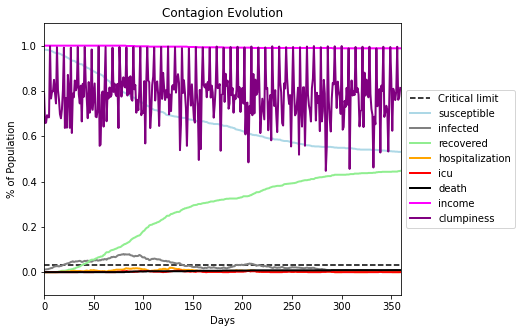

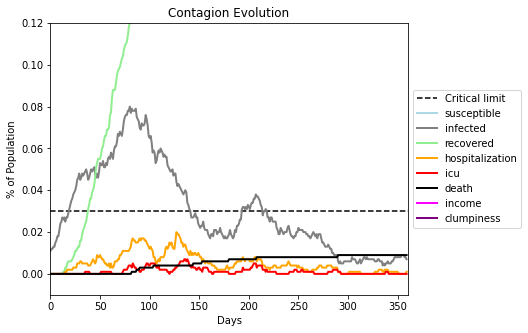

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.09896890616172174 at temperature 1
Average similarity between family and home is 0.9921807477915588 at temperature -1
Average similarity between students and their classroom is 0.1630107895545114 at temperature 1
Average similarity between workers is 0.1536337301324758 at temperature 1
Average friend similarity for adults: 0.18567774564613304 for kids: 0.1630115068817855
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (e

avg restaurant similarity 0.16125572014138836
avg restaurant similarity 0.21758206175894146
avg restaurant similarity 0.07444793784680487
avg restaurant similarity 0.09315371596366898
avg restaurant similarity 0.14774621107420305
avg restaurant similarity 0.15734098262935817
avg restaurant similarity 0.11465477262331551
avg restaurant similarity 0.17486343192948636
avg restaurant similarity 0.1118600280331008
avg restaurant similarity 0.12393695248371565
avg restaurant similarity 0.14644815341549516
avg restaurant similarity 0.1716767384618075
avg restaurant similarity 0.07193867354395574
avg restaurant similarity 0.1344975539095082
avg restaurant similarity 0.10403113573437442
avg restaurant similarity 0.15165320511452926
avg restaurant similarity 0.12264052365328189
avg restaurant similarity 0.13404155180151717
avg restaurant similarity 0.1081896949920398
avg restaurant similarity 0.15686674124822886
avg restaurant similarity 0.09430088369844229
avg restaurant similarity 0.0721680788

avg restaurant similarity 0.11295953393862812
avg restaurant similarity 0.16805784787032182
avg restaurant similarity 0.07277416883569625
avg restaurant similarity 0.15490597968897574
avg restaurant similarity 0.18440912866758738
avg restaurant similarity 0.11014444829093596
avg restaurant similarity 0.09534261555724924
avg restaurant similarity 0.13867347901112836
avg restaurant similarity 0.09902262871180481
avg restaurant similarity 0.04275264889636181
avg restaurant similarity 0.1529192728502029
avg restaurant similarity 0.12059049710904225
avg restaurant similarity 0.13018786717759762
avg restaurant similarity 0.15216996225377555
avg restaurant similarity 0.12587734978030193
avg restaurant similarity 0.14908793581320326
avg restaurant similarity 0.10728364009222652
avg restaurant similarity 0.12643031496554552
avg restaurant similarity 0.16070448781385768
avg restaurant similarity 0.13996922891019087
avg restaurant similarity 0.1541892343383398
avg restaurant similarity 0.08968045

(<function dict.items>, <function dict.items>, <function dict.items>)

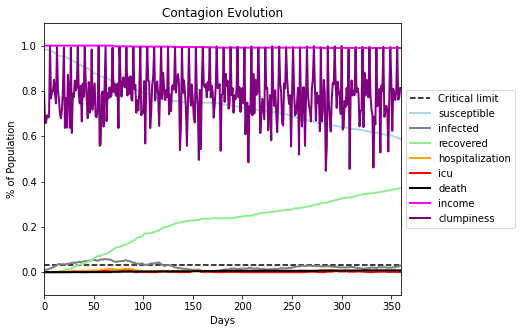

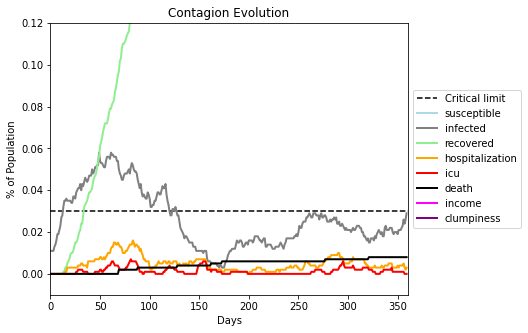

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.3438012238085629 at temperature 0
Average similarity between family and home is 0.9920136604951748 at temperature -1
Average similarity between students and their classroom is 0.4124094248422928 at temperature 0
Average similarity between workers is 0.35952708004719075 at temperature 0
Average friend similarity for adults: 0.35378356877436073 for kids: 0.38294086386663134
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (

avg restaurant similarity 0.26316472887073145
avg restaurant similarity 0.24111208559229996
avg restaurant similarity 0.20819502040204255
avg restaurant similarity 0.22275543013832866
avg restaurant similarity 0.25082092888892427
avg restaurant similarity 0.2418838686553082
avg restaurant similarity 0.2854315928094504
avg restaurant similarity 0.15714215973256296
avg restaurant similarity 0.20119526133899687
avg restaurant similarity 0.24262700045471064
avg restaurant similarity 0.2419939079451004
avg restaurant similarity 0.27329056795278495
avg restaurant similarity 0.2854118085515895
avg restaurant similarity 0.21756480671755887
avg restaurant similarity 0.2658650331018405
avg restaurant similarity 0.24179708426159063
avg restaurant similarity 0.18664763144634794
avg restaurant similarity 0.28182988599759023
avg restaurant similarity 0.267846465970186
avg restaurant similarity 0.18512483072312938
avg restaurant similarity 0.24681121822049365
avg restaurant similarity 0.1917774693261

avg restaurant similarity 0.2536581968318781
avg restaurant similarity 0.20133698961432403
avg restaurant similarity 0.23135997963815197
avg restaurant similarity 0.2638570789906694
avg restaurant similarity 0.21216765012590422
avg restaurant similarity 0.1919520824690695
avg restaurant similarity 0.24556525559344836
avg restaurant similarity 0.26215218384597055
avg restaurant similarity 0.29090482897165926
avg restaurant similarity 0.187321874594528
avg restaurant similarity 0.3041567486618122
avg restaurant similarity 0.2375311281668802
avg restaurant similarity 0.22549198662165862
avg restaurant similarity 0.20921902822471403
avg restaurant similarity 0.29149440130114956
avg restaurant similarity 0.21441874608259018
avg restaurant similarity 0.23462775408480258
avg restaurant similarity 0.26475482147459645
avg restaurant similarity 0.24587543417312077
avg restaurant similarity 0.2654683260354085
avg restaurant similarity 0.2746368824317387
avg restaurant similarity 0.395371319400289

(<function dict.items>, <function dict.items>, <function dict.items>)

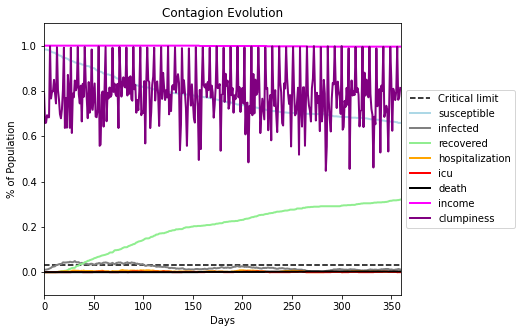

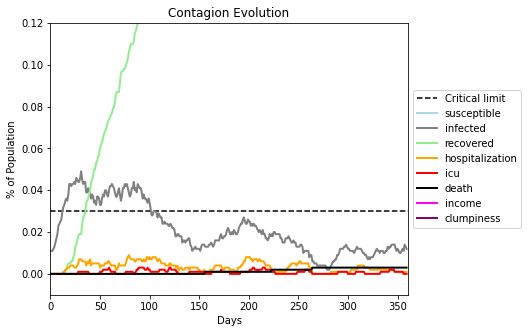

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9675]
Average similarity between family members is 0.700923244734963 at temperature -0.9
Average similarity between family and home is 0.9921081396646181 at temperature -1
Average similarity between students and their classroom is 0.5531579821792653 at temperature -0.9
Average similarity between workers is 0.5240299848327266 at temperature -0.9
Average friend similarity for adults: 0.721221124930187 for kids: 0.58825284754798
home_districts
[
Home (0,0) district with 20 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
HomogeneousBuilding: 20 units

avg restaurant similarity 0.22736054800036345
avg restaurant similarity 0.21803185350322515
avg restaurant similarity 0.2239726841866132
avg restaurant similarity 0.35392669857967685
avg restaurant similarity 0.2840475623177044
avg restaurant similarity 0.3032518853686923
avg restaurant similarity 0.26452886948112536
avg restaurant similarity 0.17105307314072798
avg restaurant similarity 0.27367933800881317
avg restaurant similarity 0.2381099353499801
avg restaurant similarity 0.25645658661036724
avg restaurant similarity 0.2661057756292216
avg restaurant similarity 0.16687195952140413
avg restaurant similarity 0.24050691466631666
avg restaurant similarity 0.28472294956867594
avg restaurant similarity 0.18116483368722316
avg restaurant similarity 0.2810208963503077
avg restaurant similarity 0.2642897083910294
avg restaurant similarity 0.21615876206566428
avg restaurant similarity 0.2840635354287965
avg restaurant similarity 0.2736330657648143
avg restaurant similarity 0.269920055175066

avg restaurant similarity 0.30030582930723865
avg restaurant similarity 0.2102580595465742
avg restaurant similarity 0.2220328927419277
avg restaurant similarity 0.2469834510272449
avg restaurant similarity 0.2586119114246798
avg restaurant similarity 0.27241834514522106
avg restaurant similarity 0.21879022876648416
avg restaurant similarity 0.29275673795649343
avg restaurant similarity 0.4105957243429515
avg restaurant similarity 0.26025747973180746
avg restaurant similarity 0.21980614111991129
avg restaurant similarity 0.26432010769234493
avg restaurant similarity 0.283370047381293
avg restaurant similarity 0.258770767485554
avg restaurant similarity 0.21180400179084596
avg restaurant similarity 0.24315679430535891
avg restaurant similarity 0.2934356449004734
avg restaurant similarity 0.1976081112994869
avg restaurant similarity 0.2591466093404951
avg restaurant similarity 0.2239534200831361
avg restaurant similarity 0.3366117417578903
avg restaurant similarity 0.38242334234552333
av

(<function dict.items>, <function dict.items>, <function dict.items>)

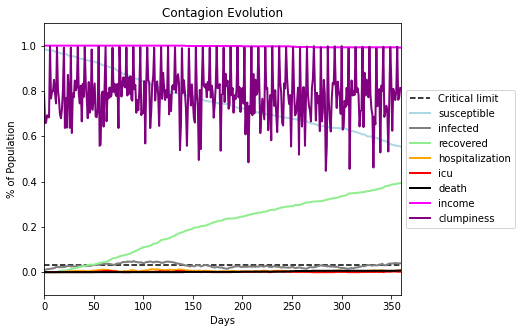

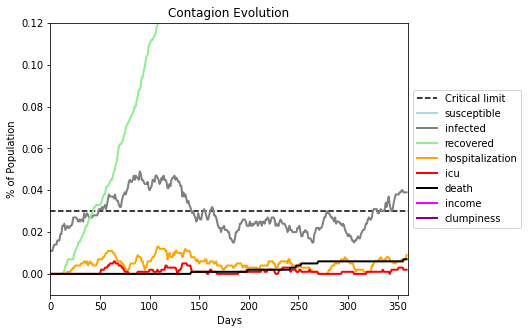

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])